In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclim 
import xarray as xr
from pathlib import Path
# import dask 
import os 

In [3]:
from Barcelona import indicators_Barcelona as iB 

In [4]:
import numpy as np 
import xarray as xr

import geopandas as gpd


import rioxarray
import xarray
from shapely.geometry import mapping


In [5]:
import xarray as xr
# dataset = xr.open_zarr('/mnt/stg/climate/CIL/iberia/CIL_historical.zip')
dataset = xr.open_zarr('/mnt/stg/climate/CIL/iberia/CIL_historical')
dataset


<xarray.Dataset> Size: 2GB
Dimensions:  (lat: 36, lon: 52, model: 11, time: 9125)
Coordinates:
  * lat      (lat) float64 288B 35.12 35.38 35.62 35.88 ... 43.38 43.62 43.88
  * lon      (lon) float64 416B -9.375 -9.125 -8.875 ... 2.875 3.125 3.375
  * model    (model) <U20 880B 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'UKESM1-0-LL'
  * time     (time) object 73kB 1990-01-01 12:00:00 ... 2014-12-31 12:00:00
Data variables:
    pr       (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>
    tasmax   (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>
    tasmin   (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>

In [6]:
outpath = '/mnt/stg/climate/CIL/iberia/indicators/heatwave_length/'

# Catalonia
lat_min, lat_max = 40.3, 42.6
lon_min, lon_max = -1.3, 3.4



In [7]:
# select years 1990-2005 
data = dataset.sel(time=slice("1990","2005")).sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
# convert to C 
data = data - 273.15 

In [8]:
# txx = iB.txx(combined['tasmax'])
hw = iB.heatwave_length(data['tasmax'],data['tasmin'])

In [9]:
hw

<xarray.DataArray (model: 11, time: 16, lat: 9, lon: 19)> Size: 241kB
dask.array<mul, shape=(11, 16, 9, 19), dtype=float64, chunksize=(1, 1, 9, 19), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 72B 40.38 40.62 40.88 41.12 ... 41.88 42.12 42.38
  * lon      (lon) float64 152B -1.125 -0.875 -0.625 ... 2.875 3.125 3.375
  * model    (model) <U20 880B 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'UKESM1-0-LL'
  * time     (time) object 128B 1990-01-01 00:00:00 ... 2005-01-01 00:00:00
Attributes:
    units:    days

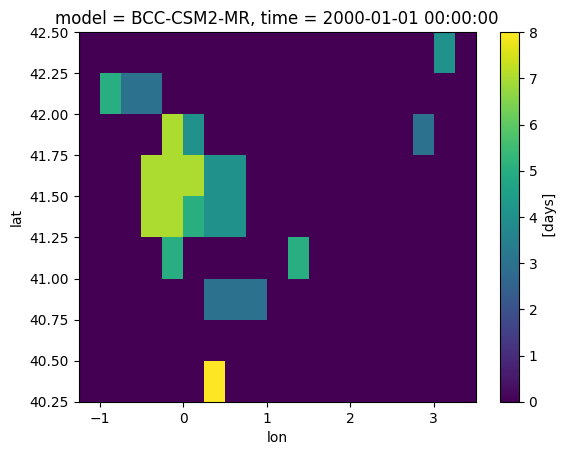

In [13]:
hw.sel(time='2000').isel(model=1).plot()

In [16]:
hw.mean(dim='time').to_netcdf(f"{outpath}Heatwave_length_Catalonia_1990_2005_mean.nc")


In [17]:
hw.to_netcdf(f"{outpath}Heatwave_length_Catalonia_1990_2005.nc")
